In [1]:
#####################################################################################
## HW3: Question 4
## Author: Sai Lone
## Created: 11/29
## Edited:  
#####################################################################################

In [2]:
rm(list = ls())

# set working director
setwd("/Users/sailone/Desktop/fall19/EAS506/HW4")

In [3]:
library("rpart")
library(randomForest)
library(gbm)
library(ElemStatLearn)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.
Loaded gbm 2.1.5


In [4]:
head(spam)
dim(spam)


A.1  A.2  A.3  A.4 A.5  A.6  A.7  A.8  A.9  A.10 ... A.49 A.50  A.51 A.52 
1 0.00 0.64 0.64 0   0.32 0.00 0.00 0.00 0.00 0.00 ... 0.00 0.000 0    0.778
2 0.21 0.28 0.50 0   0.14 0.28 0.21 0.07 0.00 0.94 ... 0.00 0.132 0    0.372
3 0.06 0.00 0.71 0   1.23 0.19 0.19 0.12 0.64 0.25 ... 0.01 0.143 0    0.276
4 0.00 0.00 0.00 0   0.63 0.00 0.31 0.63 0.31 0.63 ... 0.00 0.137 0    0.137
5 0.00 0.00 0.00 0   0.63 0.00 0.31 0.63 0.31 0.63 ... 0.00 0.135 0    0.135
6 0.00 0.00 0.00 0   1.85 0.00 0.00 1.85 0.00 0.00 ... 0.00 0.223 0    0.000
  A.53  A.54  A.55  A.56 A.57 spam
1 0.000 0.000 3.756  61   278 spam
2 0.180 0.048 5.114 101  1028 spam
3 0.184 0.010 9.821 485  2259 spam
4 0.000 0.000 3.537  40   191 spam
5 0.000 0.000 3.537  40   191 spam
6 0.000 0.000 3.000  15    54 spam

[1] 4601   58

(10 points ~ Exercise 15.6) Fit a series of random-forest classifiers to the SPAM
data, to explore the sensitivity to m (the number of randomly selected inputs for
each tree). Plot both the OOB error as well as the test error against a suitably
chosen range of values for m. 

In [8]:
# lets split the data into train and test
test_inds <- sample(1:nrow(spam), .80*nrow(spam))
spam_train <- spam[test_inds, ]
spam_test <- spam[-test_inds, ]
y_true <- as.numeric(spam_test$spam)-1


In [14]:
###############################################
# Random Forest 
###############################################
set.seed(1)

In [75]:
test_error_store <- c()
for (mtry in 1:10){
    rf.fit = randomForest(spam~., data=spam_train,mtry=mtry,ntree=2500)
    y_hat <- predict(rf.fit, spam_test, type = "response")
    y_hat <- as.numeric(y_hat)-1
    misclass_rf <-sum(abs(y_true- y_hat))/length(y_hat)
    test_error_store <- cbind(test_error_store, misclass_rf)
}

In [74]:
test_error_store
min(test_error_store) # smallest test error found at m = 6

mtry       mtry       mtry       mtry       mtry       mtry      
[1,] 0.07926167 0.04994571 0.04343105 0.04343105 0.03908795 0.04017372
     mtry       mtry       mtry       mtry     
[1,] 0.04343105 0.03800217 0.04017372 0.0412595

[1] 0.03800217

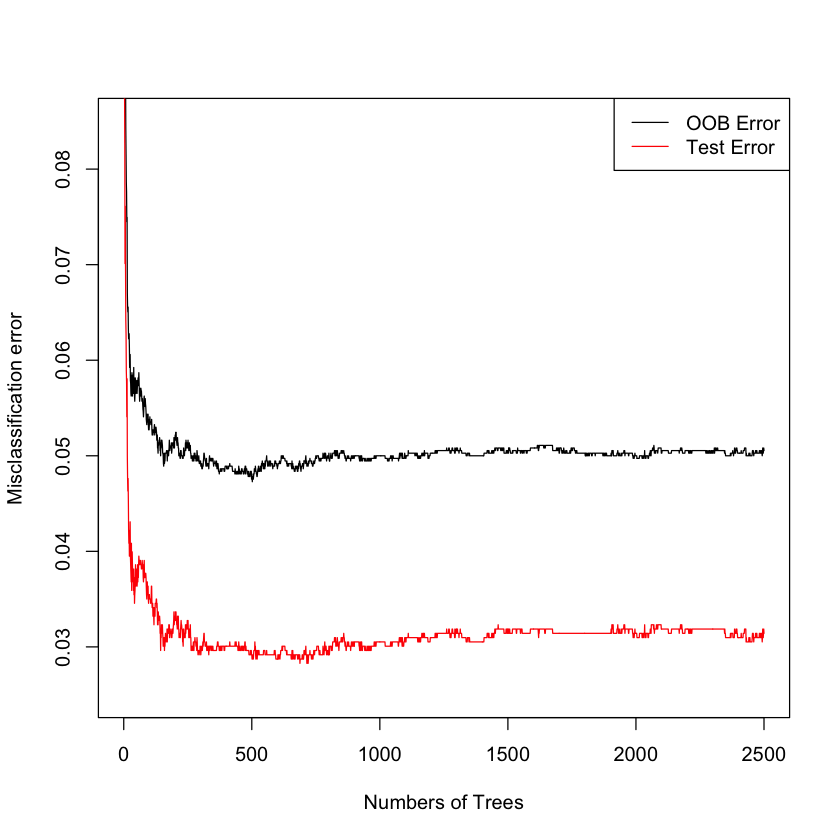

In [76]:
# let see the error rate for m = 6
rf.fit = randomForest(spam~., data=spam_train,mtry=6,ntree=2500)

plot(rf.fit$err.rate[,1], type = "l", xlab = "Numbers of Trees", ylab = "Misclassification error", ylim = c(.025, .085))
lines(rf.fit$err.rate[,2], col = "red")
legend("topright", c("OOB Error", "Test Error"), lty = c(1,1), col = c("black", "red"))
